In [3]:
from lime import lime_image
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import*
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import*
from sklearn.model_selection import train_test_split
from skimage.segmentation import mark_boundaries

In [4]:
#parameters
H, W = 224, 224
channel = 3
num_class = 3
batch_size = 64
class_names = ["glioma", "meningioma", "notumor", "pituitary"]

In [5]:
#load the model
model = load_model("./assets/resnet_for_brain_tumor.h5")

In [6]:
#preprocess function
def process_image(path):
    #read image
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    #resize the image
    image = cv2.resize(image, [224, 224])
    #scale the image
    image = image / 255.0
    #change the data type of image
    image = image.astype(np.float32)
    
    return image

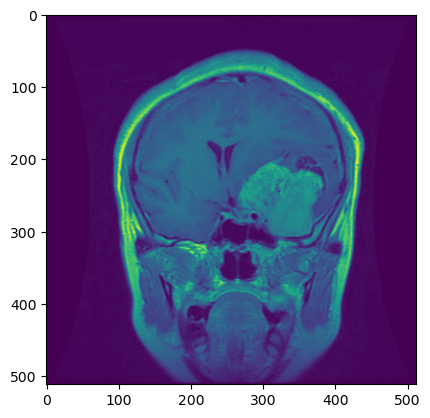

In [7]:
path = "C:\\Users\\Dark-Devil\\Downloads\\Tr-me_0026.jpg"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
image = process_image(path)

In [8]:
image = image.reshape(1, 224, 224, 3)

In [9]:
#prediction
prediction = model.predict(image)
final = np.argmax(prediction)

1/1 [==============================] - 2s 2s/step


In [10]:
classi = class_names[final]
print(classi)

meningioma


In [11]:
#load explainer
explainer = lime_image.LimeImageExplainer()

In [12]:
#read image and convert into 2D
tem = cv2.imread(path)
tem = cv2.resize(tem, [224,224])
gray_img = cv2.cvtColor(tem, cv2.COLOR_BGR2GRAY)
gray_img.shape

(224, 224)

In [13]:
explanation = explainer.explain_instance(gray_img.astype('double'), model.predict, top_labels=4, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 440ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


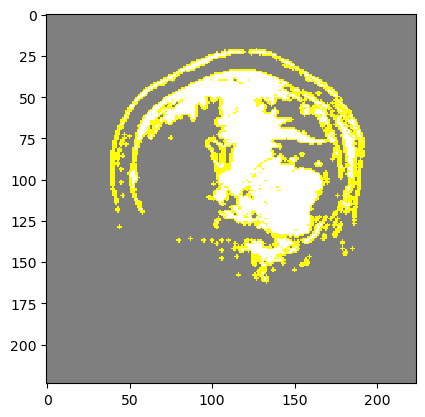

In [29]:
#plot the explantion
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask), interpolation='nearest')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


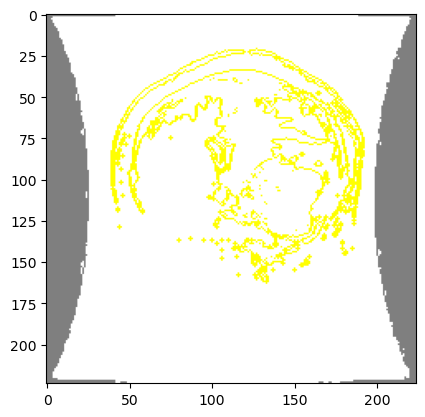

In [31]:
temp1, mask1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp1 / 2 + 0.5, mask1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


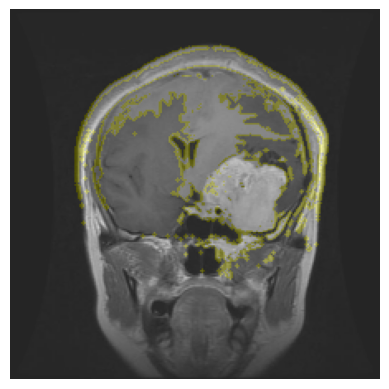

In [54]:
fig, ax = plt.subplots()
ax.imshow(img1)
ax.imshow(mark_boundaries(temp / 2 + 0.5, mask), alpha=0.3)
ax.axis('off')
plt.show()